#* The purpose of the project is to detect tampering of pan card using computer vision.This project will help different organization in detecting whether the id the pan card provided to them by their employee or customer or anyone is original or not*

In [1]:
#Import neccessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [2]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/images

In [3]:
#original image display
original=Image.open('/content/WhatsApp Image 2021-08-26 at 9.29.24 AM.jpeg')

In [6]:
#tampered image display
tampered=Image.open('/A_sample_of_Permanent_Account_Number_(PAN)_Card (1).jpg')

In [7]:
#The file format of the source file
print('Original image format:',original.format)
print('Tempered image format:',tampered.format)

Original image format: JPEG
Tempered image format: JPEG


In [8]:
#image size in pixel ,The size is given as 2-tuple(width,height)
print('original image size:',original.size)
print('tempered image size:',tampered.size)

original image size: (956, 630)
tempered image size: (300, 185)


In [10]:
#Converting the format of tampered image similar to original image
original=original.resize((250,160))
print(original.size)
original.save('pan_card_tampering/images/original.png')#save image
tampered=tampered.resize((250,160))
print(tampered.size)
tampered.save('pan_card_tampering/images/tampered.png')#save image\


(250, 160)
(250, 160)


In [12]:
tampered=Image.open('pan_card_tampering/images/tampered.png')
tampered.save('pan_card_tampering/images/tampered.png')#can change format png to jpg

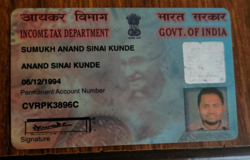

In [13]:
#Display original image
original

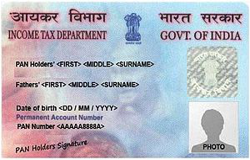

In [14]:
#display tampered image
tampered

In [15]:
#load the two input images
original=cv2.imread('pan_card_tampering/images/original.png')
tampered=cv2.imread('pan_card_tampering/images/tampered.png')

In [16]:
#reading images using opencv
#convert image to grayscale
original_gray=cv2.cvtColor(original,cv2.COLOR_BGR2GRAY)
tampered_gray=cv2.cvtColor(tampered,cv2.COLOR_BGR2GRAY)

In [17]:
#Converting the images using opencv,Because in image processing many application doesnt help us in identifying the important,edges of the color image also color image are bit complex to understand the machine because they have 3 channel while grey scale has only one channel.

In [18]:
#compute the structural similarity index between the two images ,ensuring that the difference images return
(score,diff)=structural_similarity(original_gray,tampered_gray,full=True)
diff=(diff * 255).astype('uint8')
print('SSIM:{}'.format(score))

SSIM:0.15611147236863443


In [19]:
#structural similarity help us to determine exactly where in term of x,y cordinates location,the images difference
#here,we are trying to find similarity between the original and tampered image,the lower ssim score the lower similarity.

In [20]:
#calculating threshold and contours
thresh=cv2.threshold(diff,0,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts=imutils.grab_contours(cnts)

In [21]:
#Herev we are using thresh hold fuction of computer vision which applies an adaptive threshold to the image which is stored
#in the form array.This function transform the greyscale image into a binary image using mathematical formula. 

In [22]:
#Find contours works on binary image and retrive the contours.The contours are a useful tool of shape analysis and 
#recoginition.Grab contours the appropriate value of contours

In [23]:
#loop over the contours
for c in  cnts:
  #applying contours on image 
  (x,y,w,h)=cv2.boundingRect(c)
  cv2.rectangle(original,(x,y),(x + w,y + h),(0 , 0, 255), 2 )
  cv2.rectangle(tampered,(x,y),(x + w,y + h),(0, 0,255),2)

In [24]:
#Bonding rectangle helps in finding the ratio of width to height of bonding rectangle of the object.We compute the bonding 
#box of the contours and the draw the bonding box on both input images to represent where the two images are different or not.

Original image format


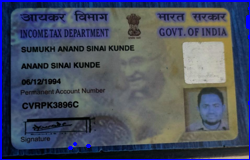

In [25]:
#display original image with contours 
print('Original image format')
Image.fromarray(original)

tampered image format


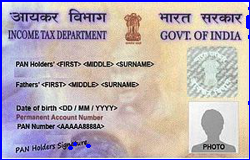

In [26]:
#display image with contours
print('tampered image format')
Image.fromarray(tampered)

Different image


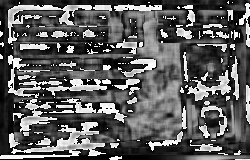

In [27]:
#display different image with black
print('Different image')
Image.fromarray(diff)

threshold image


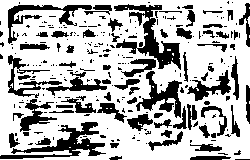

In [28]:
#display threshold image with units
print('threshold image')
Image.fromarray(thresh)

In [ ]:
#summary
#Finding out structural similarity of the image helped us in finding the difference similarity in the shape of images.
#Similarly,finding out the threshold and contours based on those threshold images converted into grayscale binary also
#helped us in shape analysis and  recognition.
#As,our ssim score is 0.15 % we can say that image provided by user is fake or tempered
#Finally we visulize the difference and similarity between the images using by displaying the images with contours and threshold


# scope 
This project can be used in different organization where customer or users need to provide any kind of id in order to get themselves verified.The organization can use this project to find out whether the id is fake or not.Similarly this can be used for any type of id like aadhar,voter id etc. 